In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
call_data = pd.read_csv('./call_data_from_CAD.csv')
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [3]:
cd_prim = call_data['PrimaryUnitCallSign'].unique()
# xJxx - CAHOOTS response
# CAHOT
# CAHOOT
# CAH
np.set_printoptions(threshold=np.inf)
print(cd_prim)

['5E57' '5T81' '3X90' '4E43' '5E88' '6E26' '5E48' 'CAHOT' '4E54' '4E61'
 '4E34' 'CMD8' '6E96' '5E46' '5E85' '3F68' '3J79' nan '3F65' '4E23' '6E29'
 '6E38' '4F72' '5E87' '6E16' '3F61' '5E55' '4E12' '4E81' '5E66' '4T88'
 '1X10' '2E22' '1E51' '1U57' '1E44' '1E53' '1F64' '2E34' '2E26' '2R16'
 '3J78' '1E42' '1M12' '1M13' '3E96' '2E14' '3U69' '3E29' '3E55' 'AWO'
 '2Y49' '3U24' '3W79' '3E16' '3U58' '3E46' '1D12' '1M14' '2X22' '4E53'
 '3X30' '4F71' '4X40' '5K97' '4K98' '5T82' '4E93' '4E22' '4E42' '6E18'
 '6T86' '5U55' 'CMD1' '6E25' '4F73' '6T84' '4X43' '6X60' '3J77' '2E91'
 '1U54' '2E35' '1E52' '2E11' '2C81' '2W77' '3E19' '3E68' '3U38' '3E15'
 '2M3' '3E59' '3E61' '5E51' '4E52' 'CMD9' '4E24' '6U96' '5E45' '6E37'
 '5E65' '4Z24' '5X51' '5E56' '6E15' '6Z26' '6E59' '5E35' '4E68' '5T86'
 '1E24' '4U24' '1J77' '6E28' '5E58' '1E43' '1E37' '6E61' '1E54' '1F65'
 '2E47' '2E64' '1F73' '3E57' '3W76' '3E44' 'EP348' '2Y45' '3E45' '2Y91'
 '2K81' '4X41' '5E18' '5E52' '4E26' '4E69' '6X61' '4J79' '6E45' '6E58'
 '

In [4]:
cd_resp = call_data['RespondingUnitCallSign'].unique()
print(cd_resp)

['5E57' '4X40' '4E53' '5T81' '3F61' '4F72' '4F71' '3X90' '4E12' '4E43'
 '5E46' '5E66' '5E88' '3J79' '6E26' '4E23' '5E48' nan '4E54' '4E61' '4E34'
 'CMD8' '5E55' '6E96' '5K97' '6E38' '5E85' '5E87' '3F68' '3F65' '4K98'
 '5X50' '6E29' '6E16' '4E81' '4T88' '1E42' '1E44' '1X10' '2E26' '2E22'
 '1E53' '1E51' '1U57' '1F64' '2E34' '2E14' '2X22' '2R16' '3J78' '1M13'
 '1M12' '3E96' '3U58' '3U69' '3E29' '3E55' '3E16' '2Y35' '2Y44' '2Y49'
 '3U24' '1M14' '3E46' '1D12' '3W79' '3X30' '5T82' '4E93' '4E22' '4E42'
 '6X60' '6E18' '4X43' '6T86' 'CMD1' '6E25' '5U55' '4F73' '4E21' '4E51'
 '6T84' '3J77' '2E91' '1U54' '1E52' '2E35' '2E11' '2C81' '3E59' '3E15'
 '3E19' '3E68' '3U38' '2M3' '3E61' '2W77' '4Z24' '5E51' '2X20' '3X31'
 '4E24' '4E52' 'CMD9' '5E56' '6U96' '5E45' '5X51' '5E65' '6E37' '6E15'
 '6Z26' '6X61' '6E59' '5E35' '5T86' '6E61' '4E68' '6E28' '1E24' '1E54'
 '4U24' '4X41' 'CMD7' '1J77' '5E58' '1E43' '1E37' '2E47' '1F65' '2E64'
 '1F73' '3E57' '3E28' '3E44' '3W76' '3E45' '5E18' '5E52' '4E26' '4E69'
 '6

In [5]:
pd.set_option('display.max_rows', None)
call_data['InitialIncidentTypeDescription'].value_counts()

InitialIncidentTypeDescription
DISPUTE                           84220
TRAFFIC STOP                      74200
PATROL CHECK                      65089
CHECK WELFARE                     62870
CRIMINAL TRESPASS                 59253
DISORDERLY SUBJECT                43819
ASSIST PUBLIC- POLICE             31093
BEAT INFORMATION                  30245
PERSON STOP                       30037
SUSPICIOUS CONDITIONS             24912
FOLLOW UP                         24471
THEFT                             24300
ILLEGAL CAMPING                   20366
SUICIDAL SUBJECT                  18903
BURGLARY                          17360
TRANSPORT                         16569
TRAFFIC HAZARD                    16124
SUSPICIOUS SUBJECT                15406
MOTOR VEH ACC UNKNOWN INJ         14234
THEFT FROM VEHICLE                12946
HARASSMENT                        11334
ATTEMPT TO LOCATE DRUNK DRIVER    11129
INFORMATION - POLICE              10617
RECKLESS DRIVING                  10429
HIT AND R

In [7]:
call_data[call_data['PrimaryUnitCallSign'].str.contains('J', case=False, na=False)]['PrimaryUnitCallSign']

43         3J79
151        3J79
237        3J78
241        3J78
270        3J78
310        3J78
327        3J78
344        3J79
359        3J78
380        3J78
386        3J78
393        3J79
417        3J78
423        3J78
429        3J78
430        3J78
439        3J78
445        3J79
446        3J79
447        3J79
451        3J78
452        3J78
453        3J78
465        3J79
498        3J79
505        3J79
507        3J78
540        3J79
549        3J78
553        3J79
568        3J78
570        3J79
594        3J79
610        3J79
682        3J79
730        3J79
735        3J79
776        3J79
823        3J77
828        3J77
833        3J77
841        3J77
856        3J77
857        3J77
859        3J77
862        3J77
863        3J78
871        3J78
881        3J78
882        3J77
883        3J77
895        3J78
900        3J78
904        3J78
918        3J78
941        3J78
956        3J78
957        3J78
974        3J78
978        3J78
1000       3J78
1001       3J78
1002    

In [8]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1048575 non-null  int64  
 1   IncidentNumber                  1048575 non-null  object 
 2   Call_Created_Time               1048575 non-null  object 
 3   Call_First_Dispatched_Time      851840 non-null   object 
 4   Call_First_On_Scene             790495 non-null   object 
 5   Call_Cleared                    858525 non-null   object 
 6   Call_Zipcode                    1011473 non-null  float64
 7   Beat                            1048140 non-null  object 
 8   Call_Source                     1048560 non-null  object 
 9   Call_Priority                   1047165 non-null  object 
 10  InitialIncidentTypeDescription  1048543 non-null  object 
 11  IsPrimary                       1048575 non-null  int64  
 12  

In [9]:
call_data = call_data.drop('Unnamed: 0', axis=1)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [10]:
call_data['Call_Created_Time'] = pd.to_datetime(
    call_data['Call_Created_Time'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [11]:
exclude_exact = {
    'TRANSPORT',
    'MENTAL TRANSPORT',
    'DISORDERLY MEDICAL TRANSPORT',
    'SHELTER TRANSPORT',
    'BASIC NEEDS'
}

exclude_keywords = ['transport', 'pickup', 'basic needs', 'shelter']
pattern = '|'.join(exclude_keywords)
call_signs = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

In [12]:
call_data_td = call_data[[
    'IncidentNumber', 
    'Call_Created_Time', 
    'PrimaryUnitCallSign', 
    'RespondingUnitCallSign', 
    'InitialIncidentTypeDescription'
]].copy()

call_data_td['Call_Created_Time'] = pd.to_datetime(call_data_td['Call_Created_Time'], errors='coerce')
call_data_td = call_data_td.dropna(subset=['Call_Created_Time'])

call_data_td['PrimaryUnitCallSign'] = call_data_td['PrimaryUnitCallSign'].str.strip().str.upper()
call_data_td['RespondingUnitCallSign'] = call_data_td['RespondingUnitCallSign'].str.strip().str.upper()
call_data_td['InitialIncidentTypeDescription'] = call_data_td['InitialIncidentTypeDescription'].str.strip().str.lower()

call_data_td = call_data_td.dropna(subset=[
    'PrimaryUnitCallSign', 'RespondingUnitCallSign', 'InitialIncidentTypeDescription'
])

In [13]:
exc_partial = call_data_td[call_data_td['InitialIncidentTypeDescription'].str.contains(pattern, na=False)]
exc_exact = call_data_td[call_data_td['InitialIncidentTypeDescription'].isin([e.lower() for e in exclude_exact])]
exc_comb = pd.concat([exc_partial, exc_exact]).drop_duplicates()

call_data_td = call_data_td.drop(exc_comb.index)

call_data_td['date'] = call_data_td['Call_Created_Time'].dt.date
call_data_td['month'] = call_data_td['Call_Created_Time'].dt.to_period('M')
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01


In [14]:
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].str.contains(call_signs, regex=True, na=False)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].str.contains(call_signs, regex=True, na=False)

call_data_td['Is_Diverted'] = (~call_data_td['PrimaryIsCAH']) & (call_data_td['RespondingIsCAH'])
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01,False,False,False


In [15]:
#call_data['Call_Created_Time'] = pd.to_datetime(call_data['Call_Created_Time'], errors='coerce')
#call_data = call_data.dropna(subset=['Call_Created_Time'])
#call_data['date'] = call_data['Call_Created_Time'].dt.date
#call_data.head()

print(f"Excluded (partial): {len(exc_partial)}")
print(f"Excluded (exact): {len(exc_exact)}")
print(f"Total excluded: {len(exc_comb)}")
call_data_td['Is_Diverted'].value_counts()

Excluded (partial): 14078
Excluded (exact): 14078
Total excluded: 13960


Is_Diverted
False    823446
True       8602
Name: count, dtype: int64

In [16]:
post_apr = call_data[call_data['Call_Created_Time'] >= '2022-04-01']

# Define regex CAHOOTS pattern (same one you used)
cahoots_pattern = r"1J77\s*|3J79\s*|3J78\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

# Look for matching responding units
matched = post_apr[
    post_apr['RespondingUnitCallSign'].fillna('').str.upper().str.contains(cahoots_pattern, regex=True)
]

print(f"CAHOOTS-like calls found post-4/2022: {len(matched)}")
matched[['Call_Created_Time', 'RespondingUnitCallSign']].head(10)

CAHOOTS-like calls found post-4/2022: 1743


,Call_Created_Time,RespondingUnitCallSign
396407,2022-04-01 01:10:00,4J79
396418,2022-04-01 01:32:00,4J79
396432,2022-04-01 02:11:00,4J79
396449,2022-04-01 04:03:00,4J79
396450,2022-04-01 04:03:00,1J77
396478,2022-04-01 05:47:00,1J77
396479,2022-04-01 05:52:00,1J77
396482,2022-04-01 06:01:00,1J77
396485,2022-04-01 06:30:00,1J77
396494,2022-04-01 06:48:00,1J77


In [17]:
lost_ids = matched['IncidentNumber']

# Check if these rows are missing in your final tidy dataset
lost_from_tidy = lost_ids[~lost_ids.isin(call_data_td['IncidentNumber'])]

print(f"Number of CAHOOTS calls post-4/2022 lost from tidy dataset: {len(lost_from_tidy)}")

Number of CAHOOTS calls post-4/2022 lost from tidy dataset: 188


In [18]:
call_data.loc[
    call_data['IncidentNumber'].isin(lost_from_tidy),
    'InitialIncidentTypeDescription'
].value_counts().head(20)

InitialIncidentTypeDescription
TRANSPORT                185
CHECK WELFARE              4
INFORMATION - POLICE       4
ASSIST PUBLIC- POLICE      1
OVERDOSE                   1
INTOXICATED SUBJECT        1
Name: count, dtype: int64

In [19]:
maybe_should_keep = call_data[
    call_data['IncidentNumber'].isin(lost_from_tidy) &
    call_data['InitialIncidentTypeDescription'].isin(['CHECK WELFARE', 'INFORMATION - POLICE'])
]

maybe_should_keep[['Call_Created_Time', 'InitialIncidentTypeDescription', 'PrimaryUnitCallSign', 'RespondingUnitCallSign']]

,Call_Created_Time,InitialIncidentTypeDescription,PrimaryUnitCallSign,RespondingUnitCallSign
401016,2022-04-02 09:00:00,CHECK WELFARE,NaN,1J77
401158,2022-04-02 14:58:00,CHECK WELFARE,NaN,3J78
444590,2022-04-12 11:07:00,CHECK WELFARE,NaN,3J78
502121,2022-04-25 02:27:00,INFORMATION - POLICE,NaN,5E18
502122,2022-04-25 02:27:00,INFORMATION - POLICE,NaN,1J77
502123,2022-04-25 02:27:00,INFORMATION - POLICE,NaN,5K93
502124,2022-04-25 02:27:00,INFORMATION - POLICE,NaN,6X61
506961,2022-04-26 16:32:00,CHECK WELFARE,NaN,4J79


In [20]:
call_data_td[call_data_td['Is_Diverted']].sample(5)

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
955326,OR-2017-08-02-17186277,2017-08-02 18:41:00,4E56,3J79,check welfare,2017-08-02,2017-08,False,True,True
736411,OR-2017-06-16-17141379,2017-06-16 14:39:00,3E63,3J78,dispute,2017-06-16,2017-06,False,True,True
408566,OR-2020-04-04-20085526,2020-04-04 13:51:00,3E21,1J77,suicidal subject,2020-04-04,2020-04,False,True,True
626720,OR-2019-05-23-19130189,2019-05-23 12:09:00,2U36,3J78,suspicious conditions,2019-05-23,2019-05,False,True,True
340829,OR-2022-03-19-22072028,2022-03-19 16:52:00,3E27,4J79,assist public- police,2022-03-19,2022-03,False,True,True


In [21]:
call_data_td = call_data_td[
    call_data_td['Call_Created_Time'] < '2022-05-01'
]
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,assault,2016-01-01,2016-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,assault,2016-01-01,2016-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,assault,2016-01-01,2016-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,traffic stop,2016-01-01,2016-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,check welfare,2016-01-01,2016-01,False,False,False


In [22]:
call_data_td['Call_Created_Time'].min(), call_data_td['Call_Created_Time'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2022-04-30 23:58:00'))

In [23]:
overall_diverted_proportion = call_data_td['Is_Diverted'].mean()
print(f"Overall Diversion Rate: {overall_diverted_proportion:.2%}")

Overall Diversion Rate: 1.23%


In [24]:
monthly = (
    call_data_td.groupby('month')['Is_Diverted']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Diverted', 'count': 'Total'})
)

monthly['Proportion_Diverted'] = monthly['Diverted'] / monthly['Total']
monthly.reset_index(inplace=True)
monthly

,month,Diverted,Total,Proportion_Diverted
0,2016-01,142,13242,0.010723
1,2016-02,137,13415,0.010212
2,2016-03,155,12999,0.011924
3,2016-04,169,12981,0.013019
4,2016-05,210,13219,0.015886
5,2016-06,175,13580,0.012887
6,2016-07,166,14885,0.011152
7,2016-08,117,10249,0.011416
8,2017-01,172,12786,0.013452
9,2017-02,161,12077,0.013331


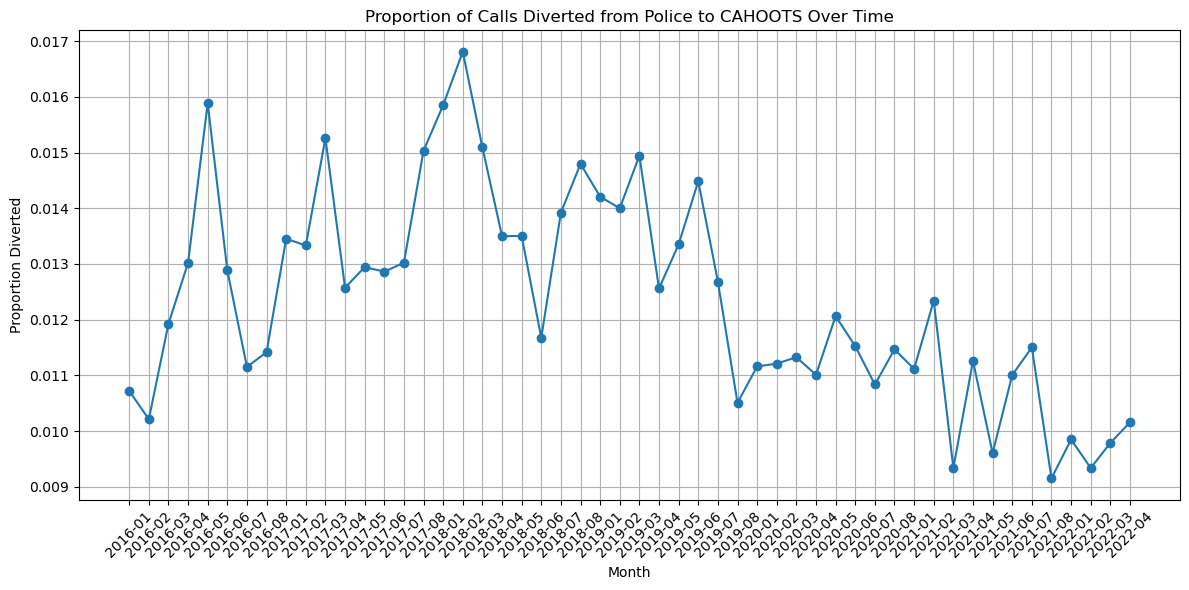

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], marker='o')
plt.xticks(rotation=45)
plt.title("Proportion of Calls Diverted from Police to CAHOOTS Over Time")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.grid(True)
plt.tight_layout()
plt.show()

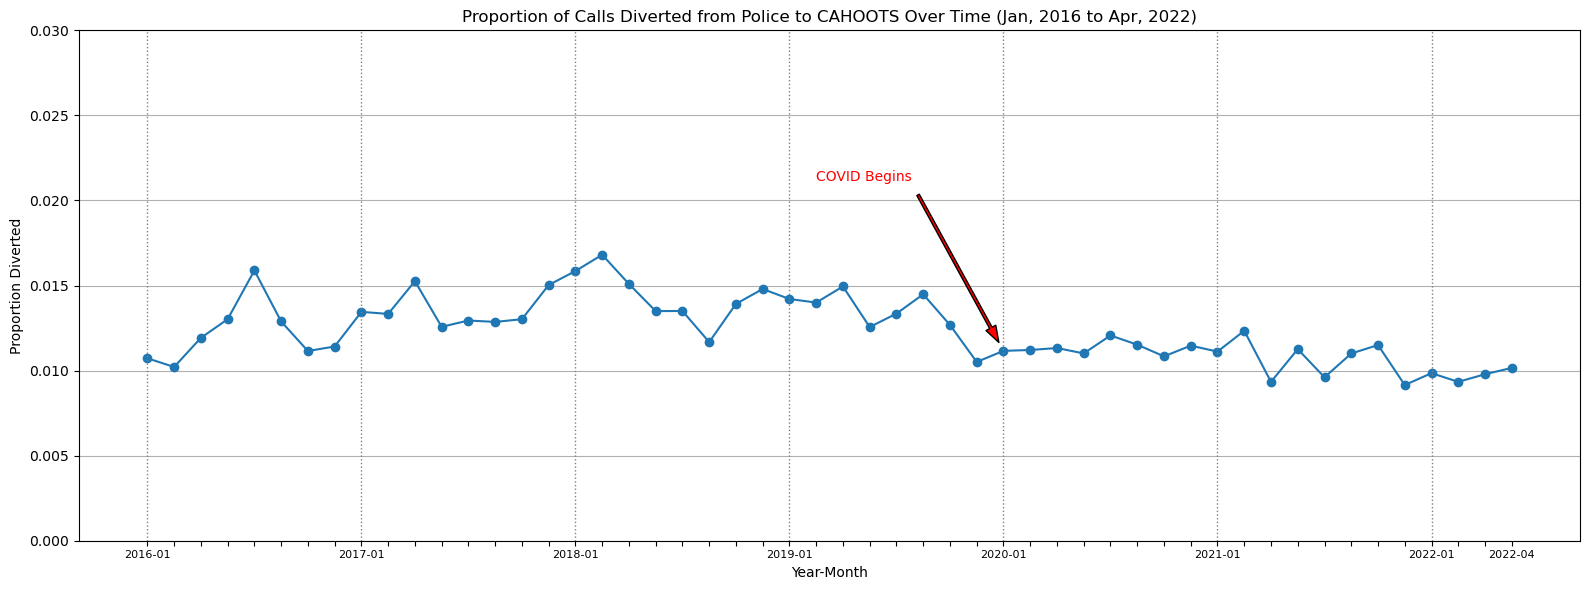

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], marker='o')


# Find all January months and add April 2022 manually
jan_labels = monthly[monthly['month'].dt.month == 1]['month'].astype(str).tolist()
if '2022-04' in monthly['month'].astype(str).values:
    jan_labels.append('2022-04')

# Set xticks to every month, but only label Jan + final April
all_months = monthly['month'].astype(str).tolist()
tick_locs = list(range(len(all_months)))
tick_labels = [label if label in jan_labels else '' for label in all_months]

covid_month = '2020-01'
if covid_month in all_months:
    covid_index = all_months.index(covid_month)
    covid_value = monthly.loc[monthly['month'].astype(str) == covid_month, 'Proportion_Diverted'].values[0]
    
    plt.annotate(
        'COVID Begins',
        xy=(covid_index, covid_value),
        xytext=(covid_index - 7, covid_value + 0.01),
        arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
        fontsize=10,
        color='red'
    )
# covid_index = monthly['month'].astype(str).tolist().index('2020-01')
# plt.axvline(x=covid_index, color='gray', linestyle='dotted', linewidth=1)
jan_indexes = [i for i, m in enumerate(all_months) if m.endswith('-01')]
for idx in jan_indexes:
    plt.axvline(x=idx, color='gray', linestyle='dotted', linewidth=1)

plt.xticks(tick_locs, tick_labels, fontsize=8)
plt.title("Proportion of Calls Diverted from Police to CAHOOTS Over Time (Jan, 2016 to Apr, 2022)")
plt.xlabel("Year-Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.03)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


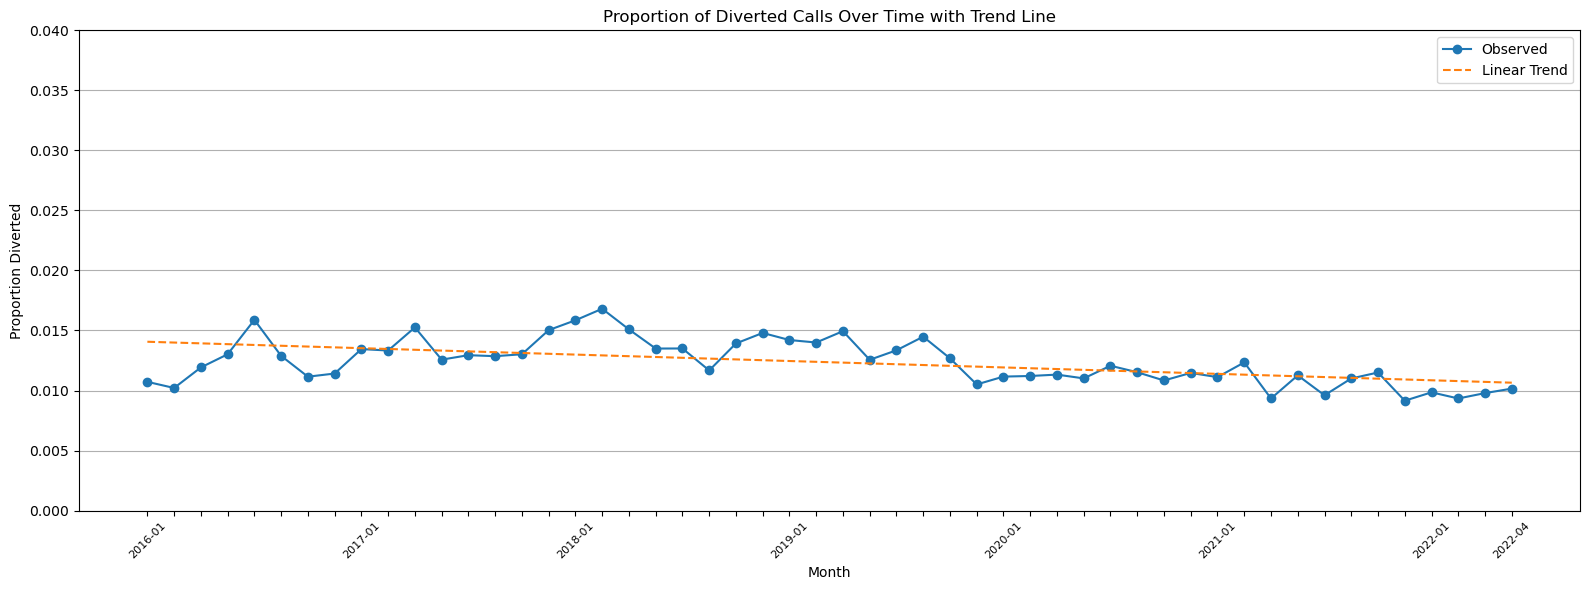

In [30]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert month to numeric (e.g., 0, 1, 2, ...)
monthly = monthly.copy()
monthly['month_num'] = np.arange(len(monthly))

# Fit model
X = monthly[['month_num']]
y = monthly['Proportion_Diverted']
model = LinearRegression().fit(X, y)

# Add predicted trendline to plot
monthly['trend'] = model.predict(X)
plt.figure(figsize=(16, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month'].astype(str), monthly['trend'], label='Linear Trend', linestyle='--')
plt.xticks(tick_locs, tick_labels, rotation=45, fontsize=8)
plt.title("Proportion of Diverted Calls Over Time with Trend Line")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.04)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
# Define CAHOOTS call signs
cahoots_units = {"1J77", "3J79", "3J78", "4J79", "3J81", "3J76", "2J28", "2J29", "CAHOOT", "CAHOT", "CAHO"}

# Clean and upper-case if not already
call_data_td['PrimaryUnitCallSign'] = call_data_td['PrimaryUnitCallSign'].str.strip().str.upper()
call_data_td['RespondingUnitCallSign'] = call_data_td['RespondingUnitCallSign'].str.strip().str.upper()

# Identify CAHOOTS units
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].isin(cahoots_units)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].isin(cahoots_units)

# Flag for direct CAHOOTS dispatch
call_data_td['Is_CAHOOTS_Direct'] = (call_data_td['RespondingIsCAH'] &
    (call_data_td['PrimaryIsCAH'] | call_data_td['PrimaryUnitCallSign'].isna())
)
call_data_td['Is_CAHOOTS_Direct'].value_counts()

Is_CAHOOTS_Direct
False    645369
True      52660
Name: count, dtype: int64

In [33]:
monthly_summary = call_data_td.groupby('month').agg({
    'Is_Diverted': 'sum',
    'Is_CAHOOTS_Direct': 'sum',
    'IncidentNumber': 'count'
}).rename(columns={
    'Is_Diverted': 'Diverted',
    'Is_CAHOOTS_Direct': 'Direct_CAHOOTS',
    'IncidentNumber': 'Total_Calls'
})

monthly_summary['Other_Calls'] = monthly_summary['Total_Calls'] - (
    monthly_summary['Diverted'] + monthly_summary['Direct_CAHOOTS']
)

KeyError: 'Proportion_CAHOOTS_All'

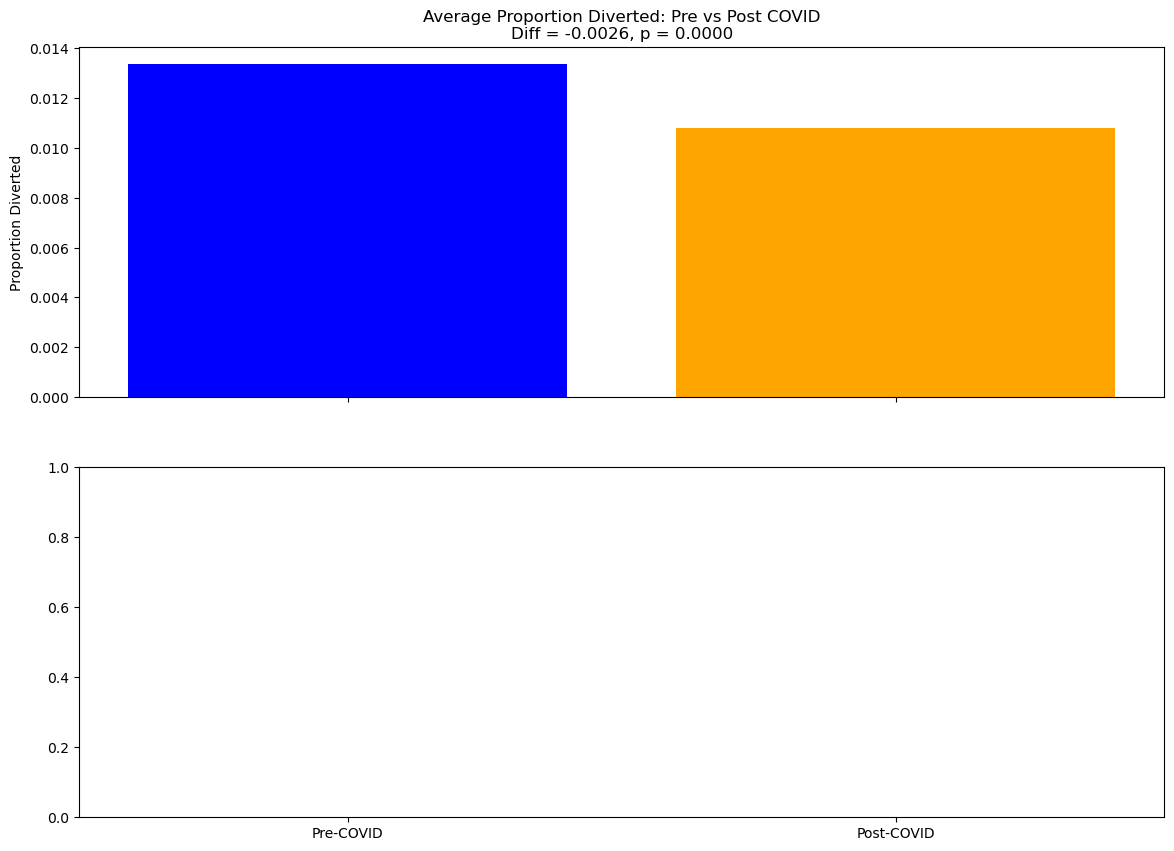

In [34]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Prepare date boundaries
pre_covid = monthly[monthly['month'] < '2020-01']
post_covid = monthly[(monthly['month'] >= '2020-01') & (monthly['month'] < '2022-04')]

# -- 1. Pre/Post COVID Comparison (t-test and means) --
pre_mean = pre_covid['Proportion_Diverted'].mean()
post_mean = post_covid['Proportion_Diverted'].mean()
mean_diff = post_mean - pre_mean

t_stat, p_val = ttest_ind(pre_covid['Proportion_Diverted'], post_covid['Proportion_Diverted'], equal_var=False)

# -- 2. Proportion of CAHOOTS-Handled Calls (Direct + Diverted) --
monthly_summary['Proportion_CAHOOTS_All'] = (monthly_summary['Diverted'] + monthly_summary['Direct_CAHOOTS']) / monthly_summary['Total_Calls']

# -- 3. Interrupted Time Series Setup --
# Ensure month is datetime for comparison
monthly['month'] = pd.to_datetime(monthly['month'].astype(str))

# Add numeric time and COVID indicators
monthly['month_num'] = np.arange(len(monthly))
monthly['post_covid'] = (monthly['month'] >= '2020-01').astype(int)
monthly['month_post_covid'] = monthly['month_num'] * monthly['post_covid']


# Fit interrupted regression manually
import statsmodels.api as sm

X = monthly[['month_num', 'post_covid', 'month_post_covid']]
X = sm.add_constant(X)
y = monthly['Proportion_Diverted']
model = sm.OLS(y, X).fit()

# Predict trend
monthly['interrupted_trend'] = model.predict(X)

# Prepare visual outputs
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Pre/Post Comparison Bar Chart
axs[0].bar(['Pre-COVID', 'Post-COVID'], [pre_mean, post_mean], color=['blue', 'orange'])
axs[0].set_title(f'Average Proportion Diverted: Pre vs Post COVID\nDiff = {mean_diff:.4f}, p = {p_val:.4f}')
axs[0].set_ylabel("Proportion Diverted")

# CAHOOTS Total Proportion Line
axs[1].plot(monthly['month'].astype(str), monthly['Proportion_CAHOOTS_All'], label='CAHOOTS Total Share', marker='o')
axs[1].set_title("Proportion of Calls Handled by CAHOOTS (Direct + Diverted)")
axs[1].set_ylabel("Proportion of All Calls")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')
axs[1].legend()

plt.tight_layout()
plt.show()

# Show interrupted time series plot separately
plt.figure(figsize=(14, 5))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month'].astype(str), monthly['interrupted_trend'], label='Interrupted Trend', linestyle='--', color='red')
plt.title("Interrupted Time Series: COVID Effect on CAHOOTS Diversions")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# mask = call_data_td['month'] >= '2022-04'
# call_data_td[mask]['RespondingUnitCallSign'].value_counts().head(10)

In [ ]:
monthly.loc[monthly['month'] >= '2022-04']

In [ ]:
cahoots_units_historical = call_data_td[call_data_td['Is_Diverted']]['RespondingUnitCallSign'].unique()
print(sorted(cahoots_units_historical))

In [ ]:
responders_after_apr2022 = call_data_td[call_data_td['month'] >= '2022-05']['RespondingUnitCallSign'].dropna().unique()
print(sorted(responders_after_apr2022))

In [ ]:
call_data_td['RespondingUnitCallSign'].dropna().unique()

In [ ]:
call_data_td['PrimaryUnitCallSign'].isna().sum()

In [ ]:
call_data_td[call_data_td['RespondingIsCAH']].sample(5)

In [ ]:
import matplotlib.pyplot as plt

monthly_summary[['Diverted', 'Direct_CAHOOTS', 'Other_Calls']].plot(
    kind='bar', stacked=True, figsize=(14, 6), width=0.9
)
plt.title("Diverted vs Direct CAHOOTS Calls Over Time")
plt.ylabel("Number of Calls")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
call_data['date'] = call_data['Call_Created_Time'].dt.date
call_data.head()

In [ ]:
call_signs = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

cah_calls = call_data[call_data['PrimaryUnitCallSign'].str.contains(call_signs, regex=True, na=False)]
cah_calls

In [ ]:
def classify(call_sign):
    if pd.isna(call_sign):
        return 'unknown'
    elif re.fullmatch(call_signs, call_sign):
        return 'not police'
    else:
        return 'police'

call_data

In [ ]:
cd_14 = pd.read_csv('./CAD_data_through_2025/class_data_2014.csv')
cd_14.head()

In [ ]:
cd_14['service'].value_counts()

In [ ]:
cd_15 = pd.read_csv('./CAD_data_through_2025/class_data_2015.csv')
cd_15.head()

In [ ]:
cd_16 = pd.read_csv('./CAD_data_through_2025/class_data_2016.csv')
cd_16.head()

In [ ]:
cd_17 = pd.read_csv('./CAD_data_through_2025/class_data_2017.csv')
cd_17.head()

In [ ]:
cd_18 = pd.read_csv('./CAD_data_through_2025/class_data_2018.csv')
cd_18.head()

In [ ]:
cd_19 = pd.read_csv('./CAD_data_through_2025/class_data_2019.csv')
cd_19.head()

In [ ]:
cd_20 = pd.read_csv('./CAD_data_through_2025/class_data_2020.csv')
cd_20.head()

In [ ]:
cd_21 = pd.read_csv('./CAD_data_through_2025/class_data_2021.csv')
cd_21.head()

In [ ]:
cd_22 = pd.read_csv('./CAD_data_through_2025/class_data_2022.csv')
cd_22.head()

In [ ]:
cd_23 = pd.read_csv('./CAD_data_through_2025/class_data_2023.csv')
cd_23.head()

In [ ]:
cd_24 = pd.read_csv('./CAD_data_through_2025/class_data_2024.csv')
cd_24.head()

In [ ]:
cd_25 = pd.read_csv('./CAD_data_through_2025/class_data_2025.csv')
cd_25.head()